<a href="https://colab.research.google.com/github/FaragoFa/PDI/blob/main/PDI_Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faragó Facundo - 114462

# ACTIVIDAD PRACTICA 3

# Cargar repositorio

In [1]:
! git clone https://github.com/FaragoFa/PDI.git

fatal: destination path 'PDI' already exists and is not an empty directory.


# Importar librerias e Imagenes

In [2]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
%matplotlib inline

#Cargo imagen
img_rgb = imageio.imread('/content/PDI/Lambda y Tizona.jpg')/255

# Funciónes

## Histograma

In [3]:
def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

## Operaciones con matrices

In [4]:
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

## RGB - YIQ

In [5]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

## IF-LIGHTER / IF-DARKER

In [6]:
def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
  
    mask = img_1_y > img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y >= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

# Practica Histogramas:

## Mostrar imagen original con su histograma

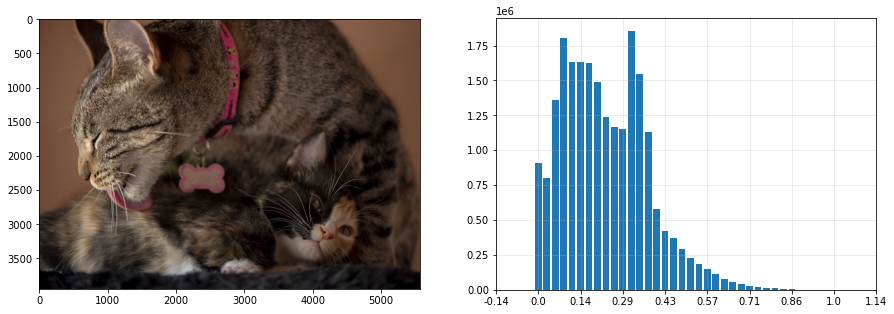

In [7]:
#img_yiq = (apply_matrix(img_rgb, M_YIQ))
#img_yiq[:,:,0] = img_yiq[:,:,0]*2
#img_rgb = apply_matrix(img_yiq, M_RGB)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(img_rgb,0,1))
plot_hist(img_rgb, 35, axes[1])

## Normalizar el histograma al rango [0, 1]


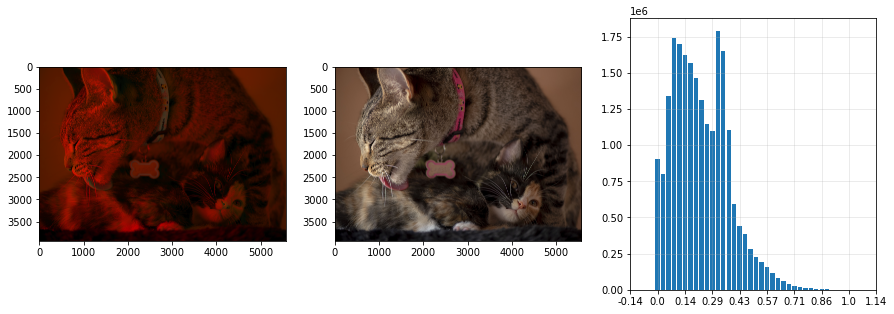

In [8]:
img_yiq = rgb2yiq(img_rgb)
img_yiq_y = img_yiq[:,:,0]
img_yiq_i = img_yiq[:,:,1]
img_yiq_q = img_yiq[:,:,2]

inMin = img_yiq_y.min()
inMax = img_yiq_y.max()
# Sabiendo el minimo y el máximo, aplicar una funcion 
# que "estire" el historgrama desde 0 a 1.
# y = [{(x-inMin)*(outMax - outMin)} / (inMax - inMin)] + outMin

y = (((img_yiq_y-inMin)*(1 - 0)) / (inMax - inMin)) + 0
img_yiq_n = img_yiq
img_yiq_n[:,:,0] = y
img_rgb_n = yiq2rgb(img_yiq_n)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_yiq_n)
axes[1].imshow(img_rgb_n)
plot_hist(img_rgb_n, 35, axes[2])

No entiendo, una vez normalizada la luminancia, el histograma no deberia ir de 0 a 1 en el eje vertical?

## Normalizar el histograma al rango [0, 1] con percentiles. 
### NOTA: Usar "np.percentile(img, %)"

In [9]:
np.percentile(img_yiq_y,20)

0.10693051349987383

## Luminancia - Corrección Gamma

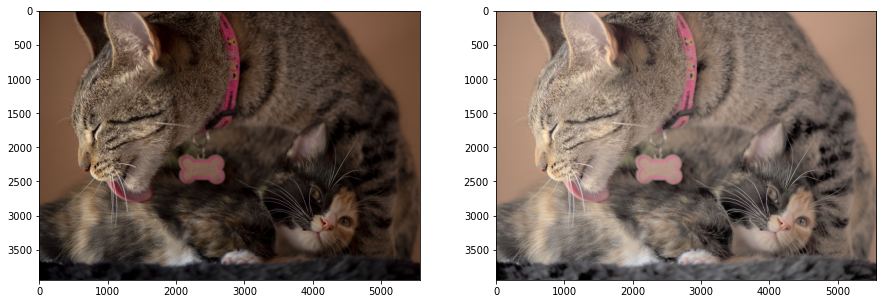

In [10]:
# Definir una función que aplique la corrección gamma a una imagen.
# Normalizar al rango [0, 1] y luego aplicar la correccion gamma.
# y_out = y_in ^ gamma 

y_out = y**(1/2)
img_yiq_g = img_yiq
img_yiq_g[:,:,0] = y_out
img_rgb_g = yiq2rgb(img_yiq_g)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img_rgb_g)



## Funciones

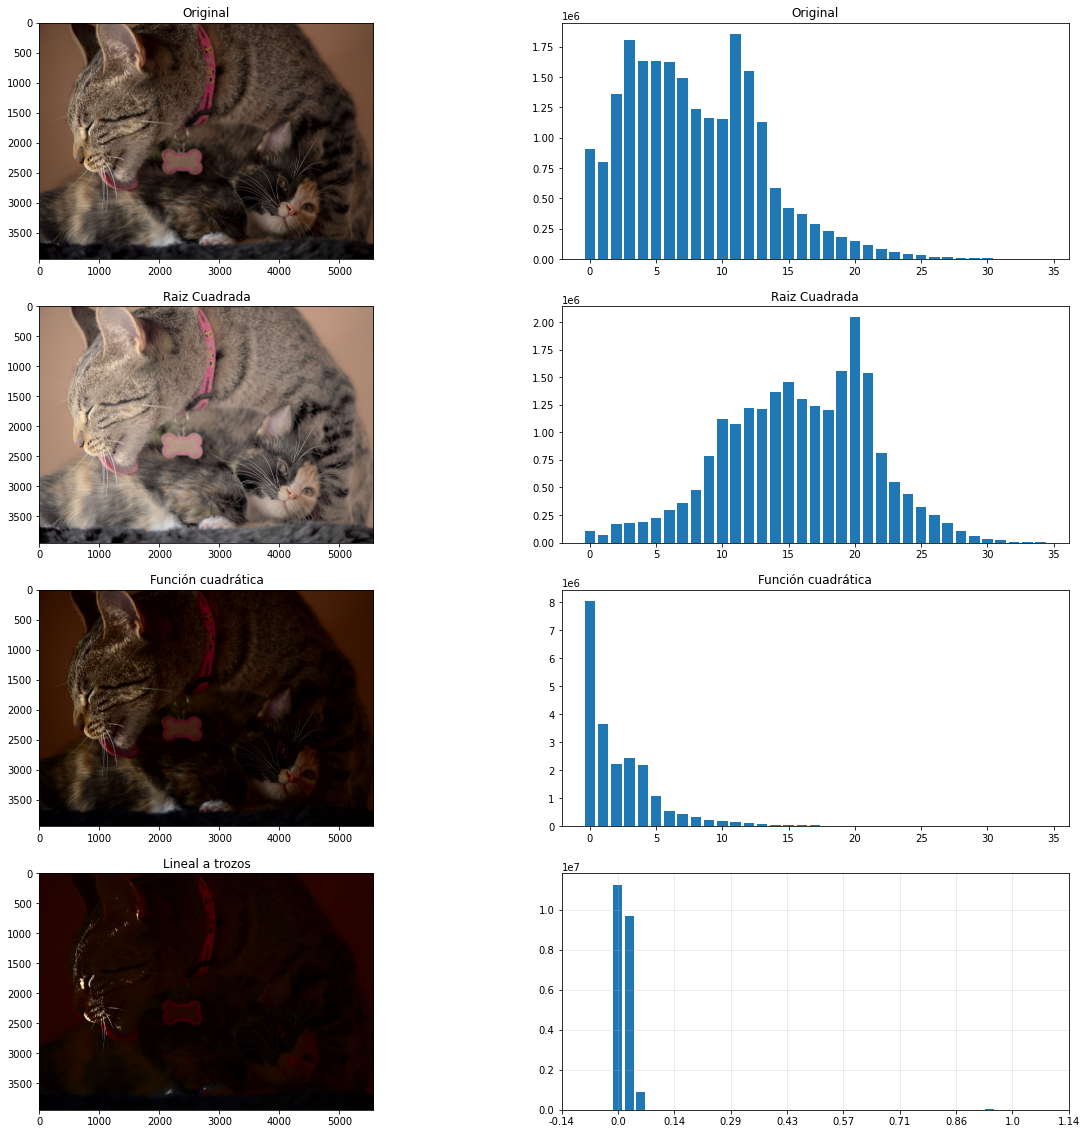

In [8]:
img_yiq = rgb2yiq(img_rgb)
img_yiq_y = img_yiq[:,:,0]
img_yiq_i = img_yiq[:,:,1]
img_yiq_q = img_yiq[:,:,2]

#--------------------------------
#Raiz Cuadrada
img_yiq_y_mod1 = np.sqrt(img_yiq_y)
#--------------------------------
#Función cuadrática
img_yiq_y_mod2 = np.square(img_yiq_y)
#--------------------------------
#Lineal a trozos
#np.interp()
x = np.array([0, 0.4, 0.7, 0.8,  1]) #[0 ... 1]
y = np.array([0, 0.05, 0.07, 0.95, 1]) #[0 ... 1]
img_yiq_y_mod3 = np.interp(img_yiq_y, x, y)
#--------------------------------
img_yiq_mod1 = np.zeros(img_rgb.shape)
img_yiq_mod1[:,:,0] = img_yiq_y_mod1
img_yiq_mod1[:,:,1] = img_yiq_i
img_yiq_mod1[:,:,2] = img_yiq_q

img_rgb_mod1 = yiq2rgb(img_yiq_mod1)
#--------------------------------
img_yiq_mod2 = np.zeros(img_rgb.shape)
img_yiq_mod2[:,:,0] = img_yiq_y_mod2
img_yiq_mod2[:,:,1] = img_yiq_i
img_yiq_mod2[:,:,2] = img_yiq_q

img_rgb_mod2 = yiq2rgb(img_yiq_mod2)
#--------------------------------
img_yiq_mod3 = np.zeros(img_rgb.shape)
img_yiq_mod3[:,:,0] = img_yiq_y_mod3
img_yiq_mod3[:,:,1] = img_yiq_i
img_yiq_mod3[:,:,2] = img_yiq_q

img_rgb_mod3 = yiq2rgb(img_yiq_mod3)
#--------------------------------

fig, axes = plt.subplots(4, 2, figsize=(20,20))
axes[0,0].set_title('Original')
axes[0,0].imshow(np.clip(img_rgb,0,1))

axes[0,1].set_title('Original')
plot_hist(img_rgb, 35, axes[0,1])

axes[1,0].set_title('Raiz Cuadrada')
axes[1,0].imshow(np.clip(img_rgb_mod1,0,1))

axes[1,1].set_title('Raiz Cuadrada')
plot_hist(img_rgb_mod1, 35, axes[1,1])

axes[2,0].set_title('Función cuadrática')
axes[2,0].imshow(np.clip(img_rgb_mod2,0,1))

axes[2,1].set_title('Función cuadrática')
plot_hist(img_rgb_mod2, 35, axes[2,1])

axes[3,0].set_title('Lineal a trozos')
axes[3,0].imshow(np.clip(img_rgb_mod3,0,1))

axes[3,0].set_title('Lineal a trozos')
plot_hist(img_rgb_mod3, 35, axes[3,1])